# Usando data e hora com pandas

In [2]:
import pandas as pd
from datetime import datetime # Para criar datas manualmente
time_stamp = pd.Timestamp(datetime(2017,1,1))

In [3]:
time_stamp.year #Recuperando o ano dos dados

2017

In [4]:
period = pd.Period('2017-01') #Objeto do período. A saída é uma frequência mensaL
period

Period('2017-01', 'M')

In [5]:
period.asfreq('D') # Convertendo a saída em dias

Period('2017-01-31', 'D')

In [6]:
period.to_timestamp().to_period('M') # Convertendo novamente para mês

Period('2017-01', 'M')

In [7]:
period = pd.Period('2017-01') # Fazendo uma soma com datas
period+2

Period('2017-03', 'M')

# Criando série temporal 

Aqui temos que especificar uma data de início e data de término.

In [8]:
index = pd.date_range(start='2017-1-1', periods=12, freq='M')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

# Indexação e reamostragem de séries temporais

- upsampling envolve aumento da frequênica de tempo
- downsampling requer agregação dos dados.
- Para entender sobre transformação, vamos aplicar isso aos dados de preços das ações do Google

In [9]:
google = pd.read_csv('google.csv') #import panda as pd
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [11]:
google.Date = pd.to_datetime(google.Date)
google.set_index('Date', inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


NameError: name 'plt' is not defined

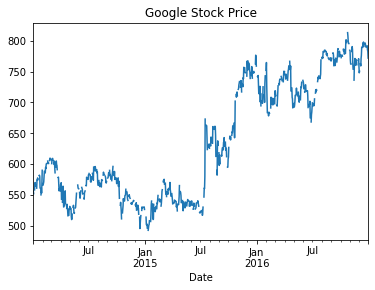

In [12]:
google.Close.plot(title='Google Stock Price')
plt.tight_layout(); plt.show()

In [14]:
google['2015'].info() #Passar texto para data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


C:\Users\MATHEU~1.ABR\AppData\Local\Temp/ipykernel_15164/2915767654.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google['2015'].info() #Passar texto para data


In [15]:
google['2015-3': '2016-2'].info() # Fatia inclui mês passado

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


- Exemplo abaixo mostra conversão de DateTimeIndex dos dados de ações do Google em frequência de dias do calendário.

In [16]:
google.asfreq('D').info() # Sequência de dias no calendário

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [17]:
google.asfreq('D').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [21]:
google = google.asfreq('B') #Chance to calendar day frequency
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 28.4 KB


# Atrasos, mudanças e retornos para séries de preços de ações

In [23]:
google['shifted'] = google.Close.shift() #default: periods=1
google.head(3)

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-06,558.10,551.95


In [24]:
google['lagged'] = google.Close.shift(periods=-1)
google[['Close', 'lagged', 'shifted']].tail(3)

,Close,lagged,shifted
Date,,,
2016-12-28,785.05,782.79,791.55
2016-12-29,782.79,771.82,785.05
2016-12-30,771.82,NaN,782.79


In [25]:
google['change'] = google.Close.div(google.shifted)
google['return'] = google.change.sub(1).mul(100)
google[['Close', 'shifted', 'change','return']].head(3)

,Close,shifted,change,return
Date,,,,
2014-01-02,556.00,NaN,NaN,NaN
2014-01-03,551.95,556.00,0.992716,-0.728417
2014-01-06,558.10,551.95,1.011142,1.114231


In [26]:
google['pct_change'] = google.Close.pct_change().mul(100)
google[['Close', 'return', 'pct_change']].head(3)

,Close,return,pct_change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,-0.728417,-0.728417
2014-01-06,558.10,1.114231,1.114231


In [27]:
google['return_3d'] = google.Close.pct_change(periods=3).mul(100)
google[['Close', 'return_3d']].head()

,Close,return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-06,558.10,NaN
2014-01-07,568.86,2.312950
2014-01-08,570.04,3.277471


# Métricas e reamostragem básica de séries temporais

In [31]:
#Creating Quartely data
dates = pd.date_range(start='2016', periods=4, freq='Q')
data = range(1, 5)
quarterly = pd.Series(data=data, index=dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [32]:
monthly = quarterly.asfreq('M') # to month-end frequency
monthly = monthly.to_frame('baseline') # to DataFrame
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


In [33]:
# Differnet Upsampling fill methods
monthly['ffill'] = quarterly.asfreq('M', method='ffill') # bfill back fill
monthly['bfill'] = quarterly.asfreq('M', method='bfill') # ffill : forward fill
monthly['value'] = quarterly.asfreq('M', fill_value=0)
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


In [34]:
# using reindex 
dates = pd.date_range(start='2016', periods=12, freq='M')
quarterly.reindex(dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

In [35]:
unrate = pd.read_csv('unrate.csv', parse_dates=['DATE'], index_col='DATE')
unrate.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [36]:
unrate.asfreq('MS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [37]:
unrate.resample('MS') # creates Resampler object
unrate.asfreq('MS').equals(unrate.resample('MS').asfreq())

True

In [40]:
# Upload the GDP growth
gdp = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp.info()

ValueError: Missing column provided to 'parse_dates': 'date'

In [41]:
ozone = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


In [42]:
ozone = ozone.resample('D').asfreq()
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


In [43]:
ozone.resample('M').mean().head()

,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


In [44]:
ozone.resample('M').median().head()

,Ozone
date,
2000-01-31,0.009486
2000-02-29,0.010726
2000-03-31,0.017004
2000-04-30,0.019866
2000-05-31,0.026018


In [45]:
ozone.resample('M').agg(['mean', 'std']).head()

Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409

<AxesSubplot:xlabel='date'>

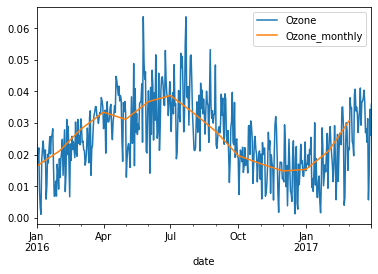

In [46]:
ozone = ozone.loc['2016':]
ax = ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)

In [47]:
# Integer-based window size
data.rolling(window=30, min_periods=1).mean() # fixed # observations

AttributeError: 'range' object has no attribute 'rolling'

C:\Users\matheus.abreu\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

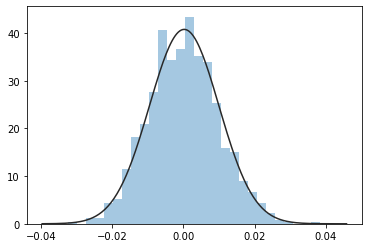

In [48]:
# Generate random numbers 
import seaborn as sns
from numpy.random import normal, seed
from scipy.stats import norm
seed(42)
random_returns = normal(loc=0, scale=0.01, size=1000)
sns.distplot(random_returns, fit=norm, kde=False)

<AxesSubplot:>

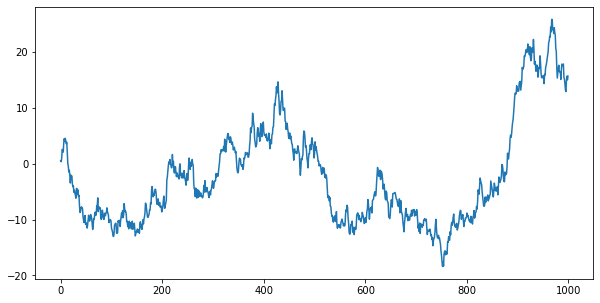

In [49]:
# Create a random price path
return_series = pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot(figsize=(10,5))